<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [ ]:
connection = psycopg2.connect(
    dbname='введите имя базы данных сюда',
    user='введите имя пользователя',
    host='введите адрес',
    password='введите пароль сюда',
    port=5432
)

In [4]:
#Отключаем предупреждение о том, что надо использовать SQLAlchemy
warnings.filterwarnings(
    "ignore",
    message="pandas only supports SQLAlchemy connectable",
    category=UserWarning
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''SELECT COUNT(*)
FROM vacancies
'''

In [6]:
# результат запроса
df3_1 = pd.read_sql_query(query_3_1, connection)
df3_1

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
# текст запроса
query_3_2 = f'''SELECT COUNT(*)
FROM employers
'''

In [8]:
# результат запроса
df3_2 = pd.read_sql_query(query_3_2, connection)
df3_2

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3_3 = f'''SELECT COUNT(*)
FROM areas
'''

In [10]:
# результат запроса
df3_3 = pd.read_sql_query(query_3_3, connection)
df3_3

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_3_4 = f'''SELECT COUNT(*)
FROM industries
'''

In [12]:
# результат запроса
df3_4 = pd.read_sql_query(query_3_4, connection)
df3_4

,count
0,294


***

In [13]:
# выводы по предварительному анализу данных
avg_vac=round(df3_1['count'][0]/df3_2['count'][0], 2)
print(f'Из полученных данных следует сделать вывод о том, что один работодатель в среднем предлагает {avg_vac} вакансий')

Из полученных данных следует сделать вывод о том, что один работодатель в среднем предлагает 2.09 вакансий


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [14]:
# текст запроса
query_4_1= f'''SELECT a.name AS area_name, COUNT(v.id) AS cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC
LIMIT 5
'''

In [15]:
# результат запроса
df4_1 = pd.read_sql_query(query_4_1, connection)
df4_1

,area_name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [16]:
# текст запроса
query_4_2= f'''SELECT 
    COUNT(*) AS cnt
FROM vacancies
WHERE salary_from IS NOT NULL 
   OR salary_to IS NOT NULL
'''

In [17]:
# результат запроса
df4_2 = pd.read_sql_query(query_4_2, connection)
df4_2

,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [18]:
# текст запроса
query_4_3= '''SELECT 
    ROUND(AVG(salary_from)) AS avg_salary_from,
    ROUND(AVG(salary_to)) AS avg_salary_to
FROM vacancies
'''

In [19]:
# результат запроса
df4_3 = pd.read_sql_query(query_4_3, connection)
df4_3

,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [20]:
# текст запроса
query_4_4= '''SELECT 
    schedule, employment, COUNT(*) as count
FROM vacancies
group by 1,2
order by count desc
'''

In [21]:
# результат запроса
df4_4 = pd.read_sql_query(query_4_4, connection)
df4_4

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [22]:
# текст запроса
query_4_5= '''SELECT 
    experience, COUNT(*) as count
FROM vacancies
group by 1
order by count
'''

In [23]:
# результат запроса
df4_5 = pd.read_sql_query(query_4_5, connection)
df4_5

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

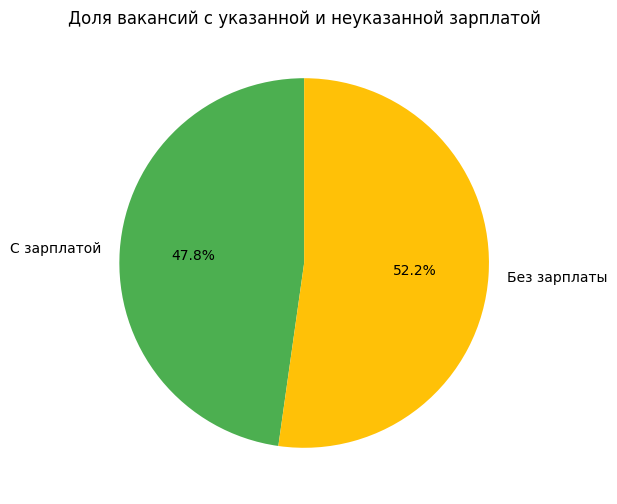

In [24]:
# выводы по детальному анализу вакансий

with_salary = df3_2['count'][0]
without_salary = df3_1['count'][0] - with_salary
labels = ['С зарплатой', 'Без зарплаты']
sizes = [with_salary, without_salary]
colors = ['#4CAF50', '#FFC107']
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Доля вакансий с указанной и неуказанной зарплатой')
plt.show()

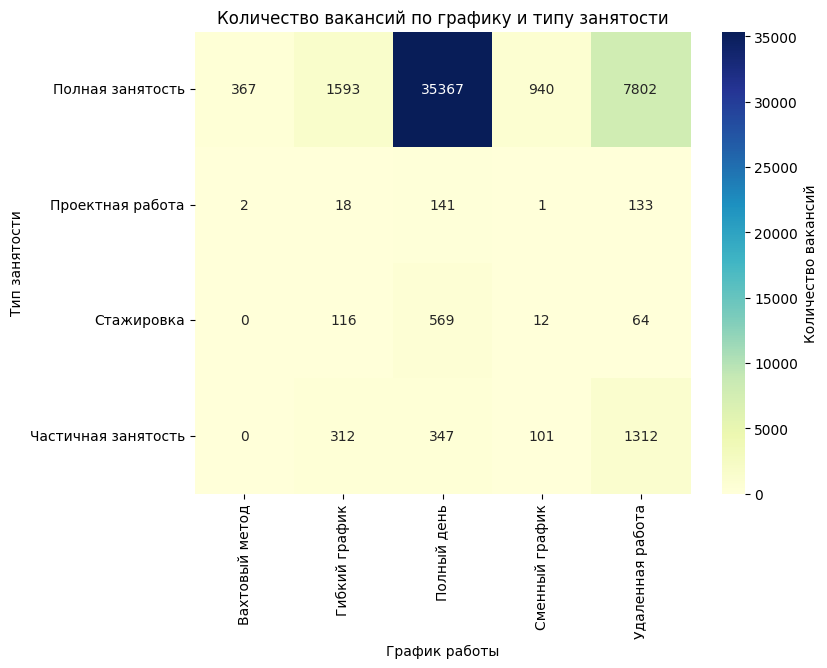

In [25]:
# Создаём сводную таблицу для heatmap
pivot_df = df4_4.pivot(index='employment', columns='schedule', values='count').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_df,
    annot=True, fmt='.0f', cmap='YlGnBu',
    cbar_kws={'label': 'Количество вакансий'}
)

plt.title('Количество вакансий по графику и типу занятости')
plt.xlabel('График работы')
plt.ylabel('Тип занятости')
plt.show()

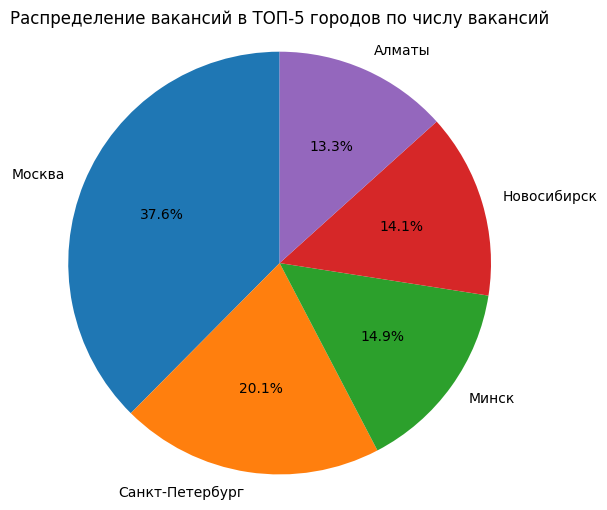

In [26]:
# Данные
labels = df4_1['area_name']
sizes = df4_1['cnt']

# Построение диаграммы
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Распределение вакансий в ТОП-5 городов по числу вакансий')
plt.axis('equal')  # чтобы круг был ровным
plt.show()

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [27]:
# текст запроса
query_5_1= '''SELECT 
    e.name, COUNT(*) as count
FROM employers as e
JOIN vacancies as v on v.employer_id=e.id
GROUP BY e.name
ORDER BY count desc
'''

In [28]:
# результат запроса
df5_1 = pd.read_sql_query(query_5_1, connection)
df5_1

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14761,им. Тьюринга,1
14762,LLC Novalab Tech,1
14763,Компания Мир упаковки,1
14764,Лифинцев Олег Иванович,1


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [29]:
# текст запроса
query_5_2= '''WITH stats AS (
  SELECT a.id AS area_id, a.name AS area_name,
         COUNT(DISTINCT e.id) AS employers_count,
         COUNT(DISTINCT v.id) AS vacancies_count
  FROM areas a
  LEFT JOIN employers e ON e.area = a.id
  LEFT JOIN vacancies v ON v.area_id = a.id
  GROUP BY a.id, a.name
)
SELECT 'ALL' AS section, *
FROM stats
UNION ALL
SELECT 'NO_VACANCIES' AS section, *
FROM stats
WHERE vacancies_count = 0
ORDER BY section, employers_count DESC, area_name;
'''

In [30]:
# результат запроса
df5_2 = pd.read_sql_query(query_5_2, connection)
df5_2

,section,area_id,area_name,employers_count,vacancies_count
0,ALL,1,Москва,5864,5333
1,ALL,2,Санкт-Петербург,2217,2851
2,ALL,1002,Минск,1115,2112
3,ALL,160,Алматы,721,1892
4,ALL,3,Екатеринбург,609,1698
...,...,...,...,...,...
1950,NO_VACANCIES,1413,Юрюзань,0,0
1951,NO_VACANCIES,5894,Ямбург (Ямало-Ненецкий АО),0,0
1952,NO_VACANCIES,5461,Янино-1,0,0
1953,NO_VACANCIES,4296,Ясный (Оренбургская область),0,0


In [31]:
# Фильтруем регионы без вакансий и выбираем с наибольшим числом работодателей. Да, это же можно было бы сделать через SQL,
# но у меня все получилось очен громоздко или очень долго по выполнению
region = (
    df5_2[df5_2['vacancies_count'] == 0]
    .sort_values(by='employers_count', ascending=False)
    .iloc[0]['area_name']
)

print("Регион без вакансий с наибольшим числом работодателей:", region)

Регион без вакансий с наибольшим числом работодателей: Россия


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [32]:
# текст 
query_5_3= '''SELECT
    e.id   AS employer_id,
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS regions_count
FROM employers e
LEFT JOIN vacancies v
  ON v.employer_id = e.id
GROUP BY e.id, e.name
ORDER BY regions_count DESC, employer_name ASC;
'''

In [33]:
# результат запроса
df5_3 = pd.read_sql_query(query_5_3, connection)
df5_3

,employer_id,employer_name,regions_count
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
...,...,...,...
23496,2745072,Ярпож Казань,0
23497,1400849,ЯРСНИП,0
23498,4417695,Ясли-сад № 28 г.Минска,0
23499,2091839,Яшин&Партнёры,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [34]:
# текст запроса
query_5_4= '''SELECT COUNT(*) AS employers_without_industry
FROM employers e
LEFT JOIN employers_industries ei ON ei.employer_id = e.id
WHERE ei.employer_id IS NULL
'''



In [35]:
# результат запроса
df5_4 = pd.read_sql_query(query_5_4, connection)
df5_4

,employers_without_industry
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [36]:
# текст запроса
query_5_5= '''SELECT e.name AS company_name
FROM employers e
JOIN employers_industries ei ON ei.employer_id = e.id
GROUP BY e.id, e.name
HAVING COUNT(DISTINCT ei.industry_id) = 4
ORDER BY e.name ASC
OFFSET 2 LIMIT 1
'''

In [37]:
# результат запроса
df5_5 = pd.read_sql_query(query_5_5, connection)
df5_5

,company_name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [38]:
# текст запроса
query_5_6= '''SELECT COUNT(DISTINCT ei.employer_id) AS employers_count
FROM employers_industries ei
JOIN industries i ON i.id = ei.industry_id
WHERE i.name = 'Разработка программного обеспечения';
'''

In [39]:
# результат запроса
df5_6 = pd.read_sql_query(query_5_6, connection)
df5_6

,employers_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [40]:
# К сожалению у меня не вышло получить данные из википедии. Что бы я не делал - в результате парсер не находил ни одного из нужных слов на полученной странице
# Просто в html не было этой таблицы, я так и не понял почему
# По этому делаем обычный список городов
million_city = [
    "Москва",
    "Санкт-Петербург",
    "Новосибирск",
    "Екатеринбург",
    "Казань",
    "Нижний Новгород",
    "Челябинск",
    "Красноярск",
    "Самара",
    "Уфа",
    "Ростов-на-Дону",
    "Омск",
    "Краснодар",
    "Воронеж",
    "Пермь",
    "Волгоград"
]

In [41]:
# текст запроса
query_5_7= '''WITH million_areas(name) AS (
  VALUES
    ('Москва'), ('Санкт-Петербург'), ('Новосибирск'), ('Екатеринбург'),
    ('Казань'), ('Нижний Новгород'), ('Челябинск'), ('Красноярск'),
    ('Самара'), ('Уфа'), ('Ростов-на-Дону'), ('Омск'),
    ('Краснодар'), ('Воронеж'), ('Пермь'), ('Волгоград')
),
per_city AS (
  SELECT a.name AS area_name, COUNT(*) AS vacancies_count
  FROM vacancies v
  JOIN employers e   ON e.id = v.employer_id
  JOIN areas a       ON a.id = v.area_id
  JOIN million_areas m ON m.name = a.name
  WHERE e.name = 'Яндекс'
  GROUP BY a.name
),
unioned AS (
  SELECT area_name, vacancies_count, 0 AS sort_key
  FROM per_city
  UNION ALL
  SELECT 'Total' AS area_name, SUM(vacancies_count) AS vacancies_count, 1 AS sort_key
  FROM per_city
)
SELECT area_name, vacancies_count
FROM unioned
ORDER BY sort_key, area_name;
'''


In [42]:
# результат запроса
df5_7 = pd.read_sql_query(query_5_7, connection)
df5_7

,area_name,vacancies_count
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


***

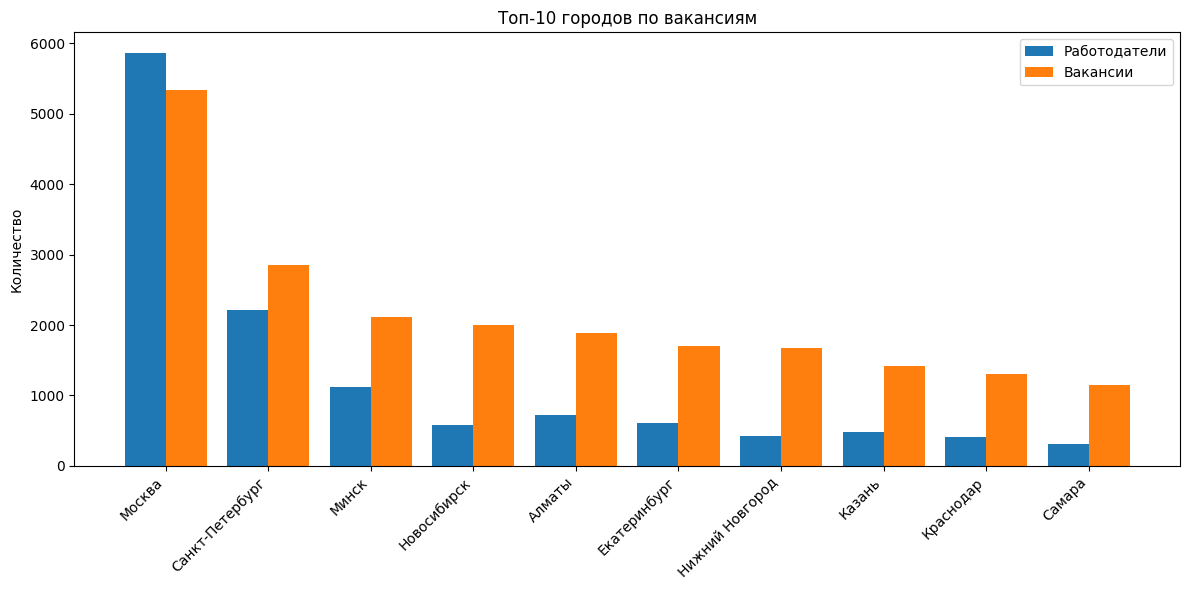

In [43]:
# выводы по анализу работодателей
# по какому показателю берем топ-10
SORT_BY = 'vacancies_count'

top = (df5_2[['area_name', 'employers_count', 'vacancies_count']]
       .sort_values(SORT_BY, ascending=False)
       .head(10)
       .reset_index(drop=True))

x = range(len(top))
w = 0.4  # ширина столбца

plt.figure(figsize=(12, 6))
plt.bar([i - w/2 for i in x], top['employers_count'], width=w, label='Работодатели')
plt.bar([i + w/2 for i in x], top['vacancies_count'], width=w, label='Вакансии')

plt.xticks(list(x), top['area_name'], rotation=45, ha='right')
plt.ylabel('Количество')
plt.title(f"Топ-10 городов по { 'вакансиям' if SORT_BY=='vacancies_count' else 'работодателям' }")
plt.legend()
plt.tight_layout()
plt.show()


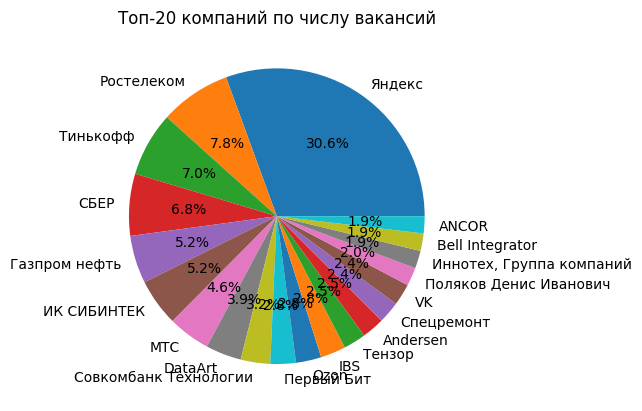

In [44]:
# Берём топ-20 компаний
df_top20 = df5_1.sort_values('count', ascending=False).head(20)

plt.pie(df_top20['count'], labels=df_top20['name'], autopct='%1.1f%%')
plt.title('Топ-20 компаний по числу вакансий')
plt.show()

Как видим, во всех регионах, кроме Москвы, число вакансий больше числа работодателей. При этом лидеры по числу как вакансий, так и работодателей - это столицы и города-миллионники. Москва - единственный город, где число работодателей выше числа вакансий. Это может свидетельствовать о том, что многие работодатели уже закрыли свои потребности в работниках и дополнительно в них не нуждаются.
Мы видим, что топ-компании занимают существенно большую долю в вакансиях среди других: Яндекс, Ростелеком, Тинькофф, Сбер, Газпром, МТС и ДатаАрт - крупные компании, которые стабильно ищут большое число сотрудников.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [45]:
# текст запроса
query_6_1= '''SELECT COUNT(*) AS vacancies_data_related
FROM vacancies
WHERE LOWER(name) LIKE '%data%'
   OR LOWER(name) LIKE '%данн%'
'''

In [46]:
# результат запроса
df6_1 = pd.read_sql_query(query_6_1, connection)
df6_1

,vacancies_data_related
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [47]:
# текст запроса
query_6_2= '''SELECT COUNT(*) AS junior_data_science
FROM vacancies v
WHERE
    (   v.name ILIKE '%data scientist%'
     OR v.name ILIKE '%data science%'
     OR v.name ILIKE '%исследователь данных%'
     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%html%')
     OR v.name ILIKE '%machine learning%'
     OR v.name ILIKE '%машинн%обучен%'
    )
  AND
    (   v.name ILIKE '%junior%'
     OR v.experience ILIKE '%нет опыта%'
     OR v.employment ILIKE '%стажир%'   -- «Стажировка»
    )
'''

In [48]:
# результат запроса
df6_2 = pd.read_sql_query(query_6_2, connection)
df6_2

,junior_data_science
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [49]:
# текст запроса
query_6_3= '''SELECT COUNT(*) AS count
FROM vacancies v
WHERE
    (   v.name ILIKE '%data scientist%'
     OR v.name ILIKE '%data science%'
     OR v.name ILIKE '%исследователь данных%'
     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%html%')
     OR v.name ILIKE '%machine learning%'
     OR v.name ILIKE '%машинн%обучен%'
    )
  AND
    (   v.key_skills ILIKE '%SQL%'
    OR v.key_skills ILIKE '%postgres%'
    )
'''

In [50]:
# результат запроса
df6_3 = pd.read_sql_query(query_6_3, connection)
df6_3

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [51]:
# текст запроса
query_6_4= '''SELECT COUNT(*) AS count_python
FROM vacancies v
WHERE
    (   v.name ILIKE '%data scientist%'
     OR v.name ILIKE '%data science%'
     OR v.name ILIKE '%исследователь данных%'
     OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%html%')
     OR v.name ILIKE '%machine learning%'
     OR v.name ILIKE '%машинн%обучен%')
  AND
    (   v.key_skills ILIKE '%python%'
    )
'''

In [52]:
# результат запроса
df6_4 = pd.read_sql_query(query_6_4, connection)
df6_4

,count_python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [53]:
# текст запроса
query_6_5= '''SELECT ROUND(
    AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1 ),
    2
) AS avg_skills
FROM vacancies
WHERE (
        name ILIKE '%data scientist%'
     OR name ILIKE '%data science%'
     OR name ILIKE '%исследователь данных%'
     OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
     OR name ILIKE '%machine learning%'
     OR name ILIKE '%машинн%обучен%'
      )
  AND key_skills IS NOT NULL
'''

In [54]:
# результат запроса
df6_5 = pd.read_sql_query(query_6_5, connection)
df6_5

,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [55]:
# текст запроса
query_6_6= '''SELECT
    experience,
    ROUND(
        AVG(
            (COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) /NULLIF( (salary_from IS NOT NULL)::int + (salary_to IS NOT NULL)::int, 0 )
        ),
        2
    ) AS avg_salary
FROM vacancies
WHERE
    (
    name ILIKE '%data scientist%'
     OR name ILIKE '%data science%'
     OR name ILIKE '%исследователь данных%'
     OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
     OR name ILIKE '%machine learning%'
     OR name ILIKE '%машинн%обучен%'
    )
  AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience;
'''

In [56]:
# результат запроса
df6_6 = pd.read_sql_query(query_6_6, connection)
df6_6

,experience,avg_salary
0,Нет опыта,74642.86
1,От 1 года до 3 лет,139674.75
2,От 3 до 6 лет,243114.67


***

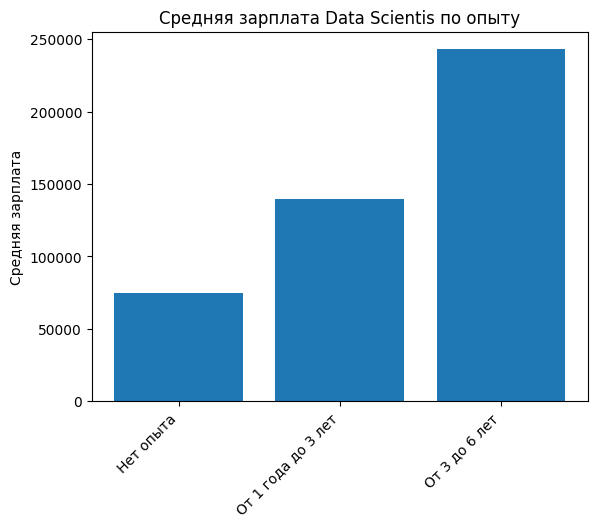

In [57]:
# выводы по предметному анализу

plt.bar(df6_6['experience'], df6_6['avg_salary'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата Data Scientis по опыту')
plt.show()


# Общий вывод по проекту

In [58]:
#Для дополнительного анализа создадим сводную таблицу
query_summary= '''SELECT
    v.id AS vacancy_id,
    v.name AS vacancy_name,
    v.key_skills,
    v.schedule,
    v.experience,
    v.employment,
    v.salary_from,
    v.salary_to,
    va.name AS vacancy_area,
    e.id AS employer_id,
    e.name AS employer_name,
    ea.name AS employer_area
FROM vacancies v
JOIN areas va 
    ON v.area_id = va.id          
JOIN employers e 
    ON v.employer_id = e.id       
JOIN areas ea 
    ON e.area = ea.id             
ORDER BY 
    va.name ASC, 
    e.name ASC;
'''
dfsummary = pd.read_sql_query(query_summary, connection)



In [59]:
# Готовим таблицы к анализу
# Удаляем столбцы employer_id и vacancy_id как не информативные
dfsummary = dfsummary.drop(columns=['employer_id', 'vacancy_id'])
# Заполняем там, где не указаны требования к навыкам "требования не указаны"
dfsummary['key_skills'] = dfsummary['key_skills'].fillna('не указаны')
#создаём копию таблицы, в которой мы уберём NaN из зарплаты
dfsalarynonan = dfsummary.copy()
# Удаляем строки, где salary_from и salary_to одновременно NaN
dfsalarynonan = dfsalarynonan.dropna(subset=['salary_from', 'salary_to'], how='all')
# Заполняем пропуски, копируя значение из соседнего столбца (считаем, что если указана минимальная зарплата, но не указана 
# максимальная или наоборот то это значит, что наниматель не торгуется и предлагает фиксированную з/п)
dfsalarynonan['salary_from'] = dfsalarynonan['salary_from'].fillna(dfsalarynonan['salary_to'])
dfsalarynonan['salary_to'] = dfsalarynonan['salary_to'].fillna(dfsalarynonan['salary_from'])





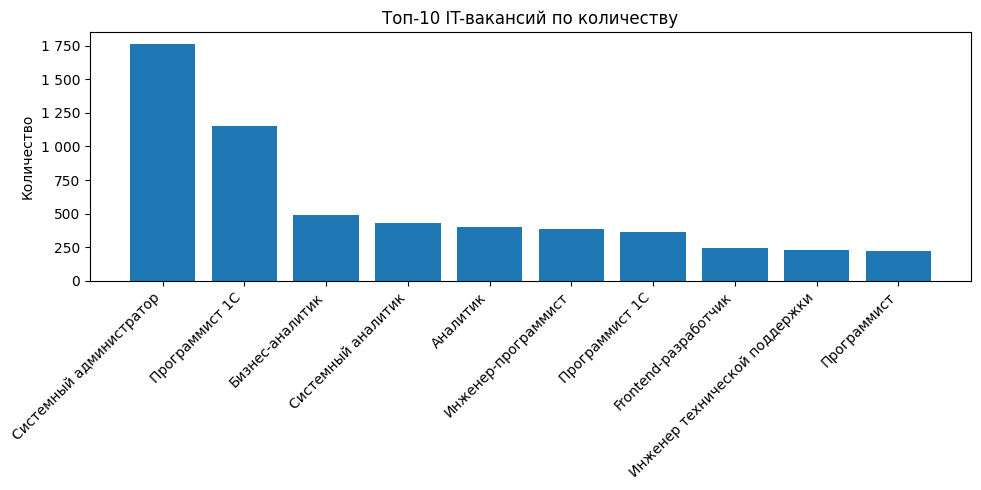

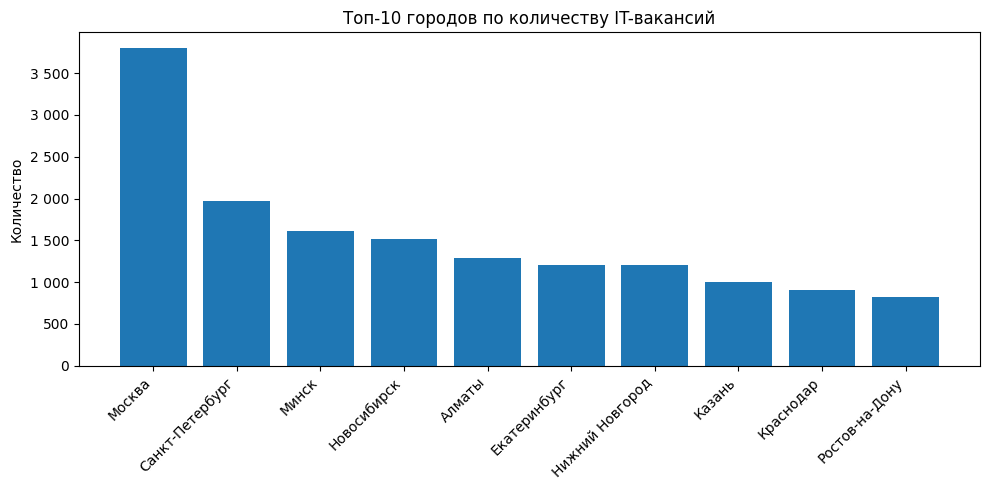

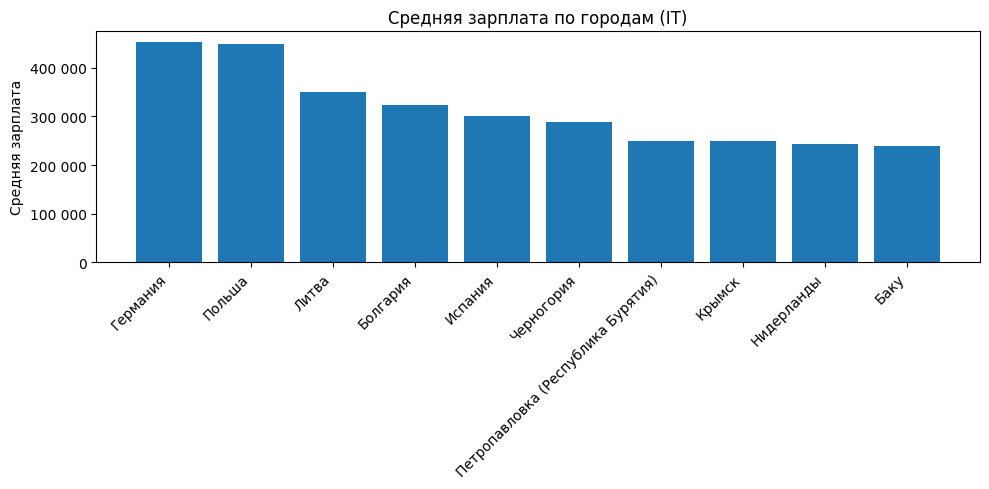

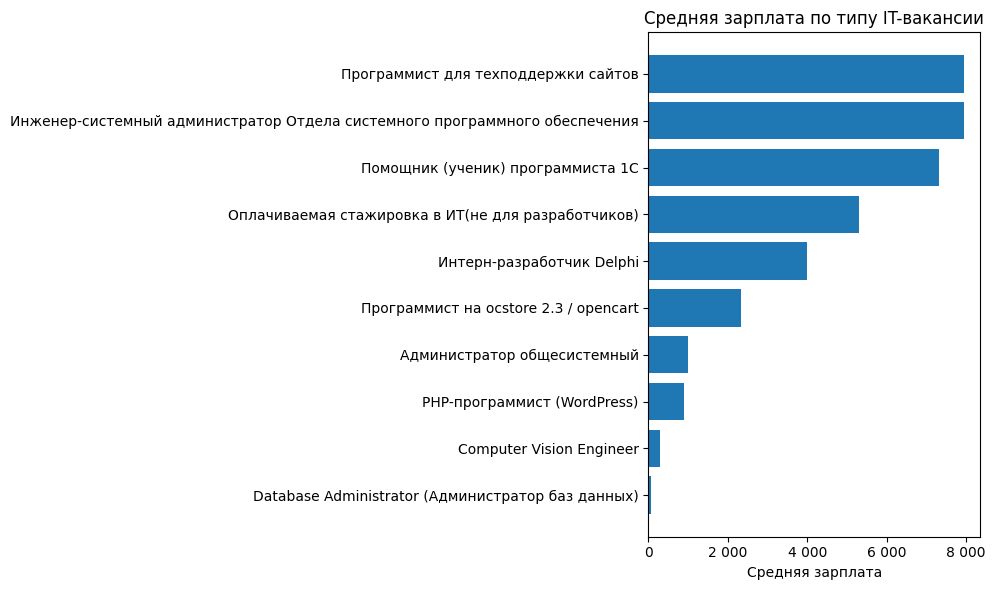

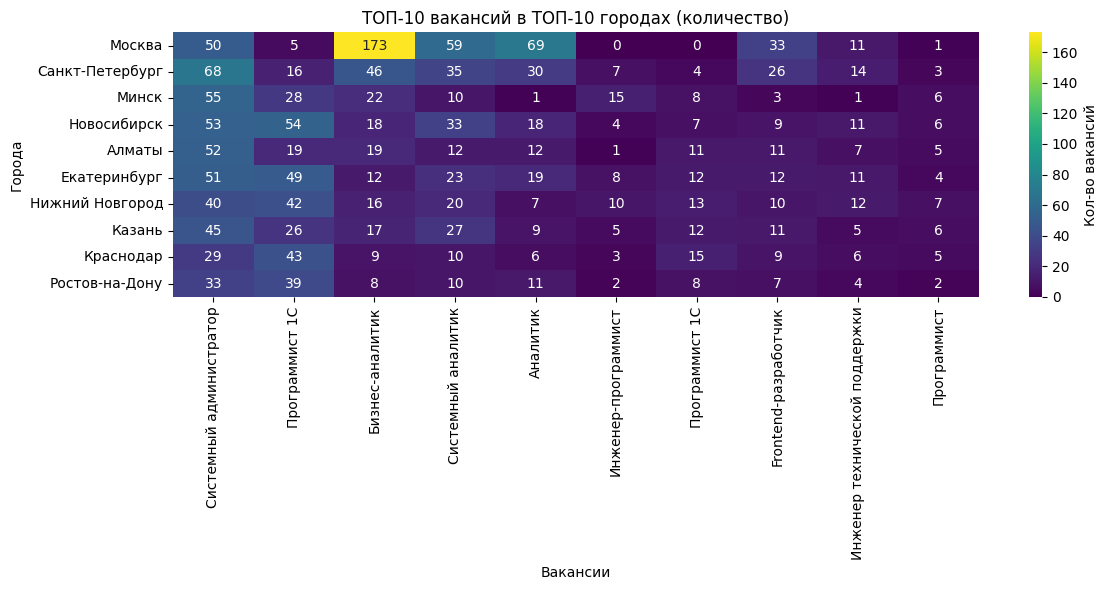

In [60]:
from matplotlib.ticker import FuncFormatter

#  загрузка данных
df_all = pd.read_csv("dfsummary.csv")
df_salary = pd.read_csv("dfsalarynonan.csv")

# оставлям только IT вакансии
it_keywords = [
    'разработ', 'developer', 'инженер', 'engineer', 'программист', 'programmer',
    'data', 'аналитик', 'analyst', 'тестировщик', 'tester', 'qa',
    'администратор', 'sysadmin', 'devops', 'архитектор', 'architect',
    'machine learning', 'ml', 'ai', 'искусственн', 'обучен'
]
# делаем так что бы легко менять ключевые слова
pattern = '|'.join(it_keywords)

df_all = df_all[df_all['vacancy_name'].str.lower().str.contains(pattern, case=False, na=False)]
df_salary = df_salary[df_salary['vacancy_name'].str.lower().str.contains(pattern, case=False, na=False)]

# делаем что бы нормально отображались зарплаты (это не я придумал)
thousands_fmt = FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))

# Топ-10 вакансий по количеству
top_vacancies = df_all['vacancy_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_vacancies.index, top_vacancies.values)
plt.title("Топ-10 IT-вакансий по количеству")
plt.ylabel("Количество")
plt.gca().yaxis.set_major_formatter(thousands_fmt)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Топ-10 городов по количеству вакансий
top_cities = df_all['vacancy_area'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_cities.index, top_cities.values)
plt.title("Топ-10 городов по количеству IT-вакансий")
plt.ylabel("Количество")
plt.gca().yaxis.set_major_formatter(thousands_fmt)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Средние зарплаты по городам
df_salary = df_salary.copy()
df_salary['avg_salary'] = (df_salary['salary_from'] + df_salary['salary_to']) / 2
avg_salary_city = (
    df_salary.groupby('vacancy_area')['avg_salary']
    .mean().sort_values(ascending=False).head(10).round(0)
)

plt.figure(figsize=(10, 5))
plt.bar(avg_salary_city.index, avg_salary_city.values)
plt.title("Средняя зарплата по городам (IT)")
plt.ylabel("Средняя зарплата")
plt.gca().yaxis.set_major_formatter(thousands_fmt)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Средние зарплаты по вакансиям
avg_salary_vacancy = (
    df_salary.groupby('vacancy_name')['avg_salary']
    .mean().sort_values(ascending=True).head(10).round(0)
)

plt.figure(figsize=(10, 6))
plt.barh(avg_salary_vacancy.index, avg_salary_vacancy.values)
plt.title("Средняя зарплата по типу IT-вакансии")
plt.xlabel("Средняя зарплата")
plt.gca().xaxis.set_major_formatter(thousands_fmt)
plt.tight_layout()
plt.show()

# График «ТОП-10 вакансий в ТОП-10 городах» 
top10_cities = df_all['vacancy_area'].value_counts().head(10).index
top10_vacancies = df_all['vacancy_name'].value_counts().head(10).index

pivot_top10 = (
    df_all[df_all['vacancy_area'].isin(top10_cities) & df_all['vacancy_name'].isin(top10_vacancies)]
    .groupby(['vacancy_area', 'vacancy_name'])
    .size()
    .unstack(fill_value=0)
    .loc[top10_cities, top10_vacancies]   # фиксируем порядок осей
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_top10,
    annot=True, fmt='d',
    cmap='viridis',  
    cbar_kws={'label': 'Кол-во вакансий'}
)
plt.title("ТОП-10 вакансий в ТОП-10 городах (количество)")
plt.xlabel("Вакансии")
plt.ylabel("Города")
plt.tight_layout()
plt.show()


In [61]:
connection.close()

Наиболее востребованные ИТ-вакансии — это системные администраторы, разработчики на Python, инженеры по тестированию, специалисты по технической поддержке и разработчики Java.

Лидирующие города по числу ИТ-вакансий — Москва, Санкт-Петербург, Минск, Новосибирск и Алматы. В этих городах сосредоточено большинство предложений для ИТ-специалистов.

Города с самыми высокими средними зарплатами в ИТ — Москва, Санкт-Петербург и Екатеринбург. Здесь работодатели готовы платить значительно выше среднего уровня по стране.

Профессии с наибольшими средними зарплатами в ИТ — ведущие разработчики, архитекторы ПО, DevOps-инженеры, специалисты по machine learning и старшие разработчики на Java. Эти позиции часто требуют большого опыта и высокой квалификации.

Рынок труда в ИТ-сфере в крупных городах остаётся высококонкурентным, но и уровень оплаты там выше, что стимулирует специалистов переезжать в эти регионы.